In [1]:
!pip install sklearn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


You should consider upgrading via the 'c:\users\manali\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'pandas'

In [ ]:
df=pd.read_csv('./Churn_Modelling.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
existed_yes = df[df['Exited']== 1].Tenure 
existed_no = df[df['Exited']== 0].Tenure 
plt.xlabel('Tenure')
plt.ylabel('no of customer')
plt.title('Churn prediction')
plt.hist([existed_no,existed_yes], color = ['red', 'blue'], label =(['Existed = no','Existed = yes']))
plt.legend()

In [ ]:
salary_no_existed = df[df.Exited== 0].EstimatedSalary
salary_yes_existed = df[df.Exited== 1].EstimatedSalary
plt.xlabel('Estimad_salary')
plt.ylabel('no of customer')
plt.title('Churn prediction')
plt.hist([salary_no_existed,salary_yes_existed], color = ['green', 'blue'], label =(['Existed = no','Existed = yes']))
plt.legend()

In [ ]:
df.Gender = df.Gender.map({'Female':1, 'Male':0}) 
df = pd.get_dummies(data=df, columns=['Geography']) 

In [ ]:
scaler = MinMaxScaler()
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
df.head()

In [ ]:
df.Exited.value_counts()

In [ ]:
x = df.drop('Exited', axis = 1) 
y = df.Exited
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train.shape

In [ ]:
x_test.shape

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(12, input_shape = (12,), activation = 'relu'),
        keras.layers.Dense(12, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')]) 


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
model.fit(x_train, y_train, epochs = 100)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
yp = model.predict(x_test)
yp[:5]

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

You should consider upgrading via the 'e:\installations\python\python.exe -m pip install --upgrade pip' command.


Text(69.0, 0.5, 'Truth')

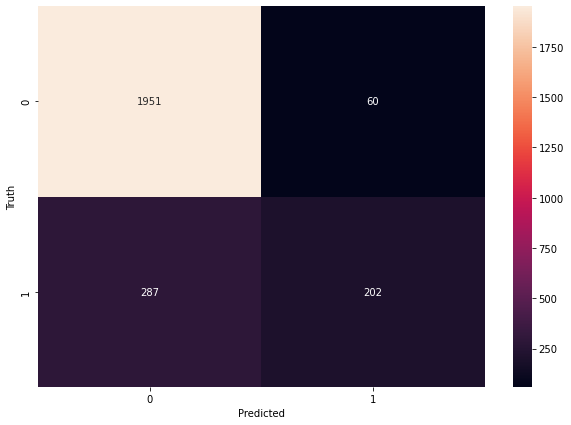

In [25]:
!pip install seaborn
import seaborn as sn
from matplotlib  import pyplot as plt

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')